<a href="https://colab.research.google.com/github/YashDarapu/Mini_Project/blob/main/MiniProject_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **IMAGE CLASSIFICATION**

In [1]:
!pip install ipython-autotime
%load_ext autotime

!pip install bing-image-downloader 

time: 2.83 s (started: 2021-02-22 08:50:50 +00:00)


In [2]:
!mkdir Images

time: 119 ms (started: 2021-02-22 08:50:56 +00:00)


In [3]:
#Gathering data using Bing Downloader

from bing_image_downloader import downloader
downloader.download("Eagle",limit=70,output_dir='Images',adult_filter_off=True)

downloader.download("Sun-Set",limit=70,output_dir='Images',adult_filter_off=True)

downloader.download("Rainbow",limit=70,output_dir='Images',adult_filter_off=True)




[!!]Indexing page: 1

[%] Indexed 70 Images on Page 1.


[%] Downloading Image #1 from https://raptor.umn.edu/sites/raptor.umn.edu/files/2020-03/Bald eagle - Adult.jpg
[!] Issue getting: https://raptor.umn.edu/sites/raptor.umn.edu/files/2020-03/Bald eagle - Adult.jpg
[!] Error:: URL can't contain control characters. '/sites/raptor.umn.edu/files/2020-03/Bald eagle - Adult.jpg' (found at least ' ')
[%] Downloading Image #1 from https://www.josephfiler.com/images/xl/Bald-Eagle-1013-Edit.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.immortal.org/wp-content/uploads/2016/03/bald-eagle-1075023_1920.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.wesa.fm/sites/wesa/files/styles/x_large/public/201708/bald_eagle.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://mediad.publicbroadcasting.net/p/wkms/files/styles/x_large/public/201810/bald_eagle.mc2_.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.outdoorhub.com/wp-con

In [4]:
# Preprocessing DATA
# 1. Resize
# 2. Flatten

import os
import matplotlib.pyplot as plt 
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

DATADIR='/content/Images'
CATEGORIES=['Eagle','Sun-Set','Rainbow']

for category in CATEGORIES:
  class_num= CATEGORIES.index(category)
  print(class_num)
  path=os.path.join(DATADIR,category) #create path to use all the images
  print(path)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized= resize(img_array,(250,250,3))  
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
  
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

0
/content/Images/Eagle
1
/content/Images/Sun-Set
2
/content/Images/Rainbow
time: 1min 53s (started: 2021-02-22 08:53:20 +00:00)


<BarContainer object of 3 artists>

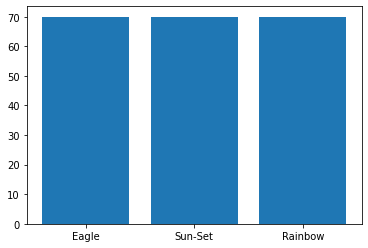

time: 167 ms (started: 2021-02-22 08:55:20 +00:00)


In [5]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [6]:
# Split data into Training ang Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.4,random_state=100)

time: 308 ms (started: 2021-02-22 08:55:25 +00:00)


In [7]:
# Applying classification algorithm - SVM Algorithm
# Using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 21min 35s (started: 2021-02-22 08:55:27 +00:00)


In [8]:
y_pred=clf.predict(x_test)
print("Original Values",y_test)
print("Predicted Values",y_pred)

Original Values [2 2 0 2 1 0 2 1 2 2 1 1 1 0 1 0 2 1 0 2 1 1 1 1 2 2 1 2 0 0 2 0 2 2 1 2 2
 2 2 1 1 0 1 1 0 2 0 2 2 1 0 2 2 2 0 2 2 0 0 1 0 1 1 0 2 0 1 1 2 1 2 1 1 2
 1 2 0 0 2 1 1 2 2 0]
Predicted Values [2 2 0 0 1 0 2 1 0 2 1 1 1 0 2 0 2 1 0 2 1 1 1 1 0 0 0 2 0 0 0 0 1 2 2 2 2
 2 2 1 1 0 2 1 0 1 2 2 2 1 2 2 2 0 0 2 2 0 0 1 0 1 0 0 2 0 1 1 0 1 2 1 1 2
 1 0 2 0 2 0 1 0 2 0]
time: 3.14 s (started: 2021-02-22 09:18:05 +00:00)


In [9]:
# Evaluating the model

from sklearn.metrics import accuracy_score,confusion_matrix

acc=accuracy_score(y_pred,y_test)

print("Accuracy in % is",acc*100)

Accuracy in % is 76.19047619047619
time: 7.31 ms (started: 2021-02-22 09:18:11 +00:00)


In [10]:
confusion_matrix(y_pred,y_test)

array([[18,  3,  9],
       [ 0, 23,  2],
       [ 3,  3, 23]])

time: 5.35 ms (started: 2021-02-22 09:18:34 +00:00)


In [11]:
# Save the model using pickle lib
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 974 ms (started: 2021-02-22 09:18:39 +00:00)


In [12]:
model= pickle.load(open('img_model.p','rb'))

time: 178 ms (started: 2021-02-22 09:18:43 +00:00)


Enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSfx7gEQ7bPyDPbUJ8lA3w4q6-g6tG7PrBXJw&usqp=CAU
(183, 275, 3)
Predicted Output:Sun-Set


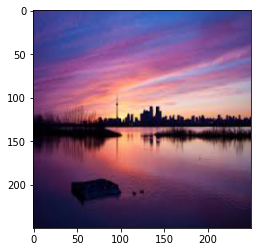

time: 3.28 s (started: 2021-02-22 09:48:54 +00:00)


In [51]:
# Predicting for a new image

flat_data=[]
url=input('Enter your url')
img=imread(url)
img_resized=resize(img,(250,250,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'Predicted Output:{y_out}')

In [52]:
# Deployment
# WebApp - Streamlit/Dash

!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.5MB 7.5MB/s 
     |████████████████████████████████| 112kB 42.8MB/s 
     |████████████████████████████████| 4.6MB 48.4MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 163kB 59.2MB/s 
     |████████████████████████████████| 122kB 56.5MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=45b4706ebae1ab9ddb2963a7153834f3acfb238f7ba751258130d00961cee9f2
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.0 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15971 sha256=157b05e02331a78ba28e5e5b4872f85d85db291681dfd264eaf1a20babb9ef22
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok
time: 19.2 s (started: 2021-02-22 09:49:04 +00:00)


In [58]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image

st.title("IMAGE CLASSIFIER")
st.text("Categories: Eagle,Sun-Set,Rainbow")
st.text("UPLOAD IMAGE")

model= pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("Choose an image",type="jpg")
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption="Uploaded Image")

  if st.button("PREDICT"):
    CATEGORIES=['Eagle','Sun-Set','Rainbow']
    st.write('RESULT')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(250,250,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')

    q=model.predict_proba(flat_data)
    for index,item in enumerate(CATEGORIES):
      st.write(f'{item}: {q[0][index]*100}%')


Overwriting app.py
time: 8.82 ms (started: 2021-02-22 09:54:40 +00:00)


In [54]:
!nohup streamlit run app.py & 
url= ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://1cebbb153d36.ngrok.io'

time: 2.13 s (started: 2021-02-22 09:50:01 +00:00)
